In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.set_random_seed(42)

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


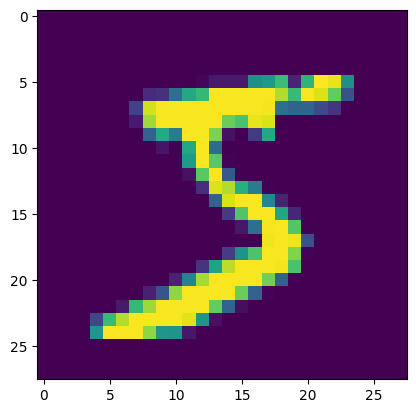

Label: 5


In [3]:
import matplotlib.pyplot as plt
#plt.imshow(x_train[0], cmap = 'gray')
plt.imshow(x_train[0])
plt.show()
print(f'Label: {y_train[0]}')

In [4]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [5]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [6]:
def plot_performance(history):
    flg, ax = plt.subplots(1,2)
    flg.tight_layout()
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].set_title('Loss')
    ax[0].plot(train_loss, label='Training Loss')
    ax[0].plot(val_loss, label='Validation Loss')
    ax[0].legend()
    
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_title('Accuracy')
    ax[1].plot(train_acc, label='Training Accuracy')
    ax[1].plot(val_acc, label='Validation Accuracy')
    ax[1].legend()

    plt.show()

## Basic model

In [7]:
input_shape = (28,28,1)

model_smallest = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.MaxPooling2D(pool_size=(28,28)),
        #layers.AveragePooling2D(pool_size=(28,28)),
        layers.Flatten(),
        layers.Dense(num_classes, activation='softmax')
    ]
)

model_smallest.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ max_pooling2d (MaxPooling2D)    │ (None, 1, 1, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │            20 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20 (80.00 B)

 Trainable params: 20 (80.00 B)

 Non-trainable params: 0 (0.00 B)

The model shown includes a **pooling layer** that reduces the spatial dimensions of the input using a 28x28 pooling window. Then, a **flattening layer** converts the output of the previous layer into a one-dimensional vector. Finally, an output layer provides the final classification. 

In [8]:
batch_size = 128
epochs = 15

model_smallest.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_smallest = model_smallest.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0974 - loss: 2.3544 - val_accuracy: 0.0975 - val_loss: 2.3085
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1154 - loss: 2.3035 - val_accuracy: 0.1060 - val_loss: 2.3023
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1160 - loss: 2.3008 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1159 - loss: 2.3008 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1159 - loss: 2.3008 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1159 - loss: 2.3008 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1159 - loss: 2.3008 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1159 - loss: 2.3008 - val_accuracy: 0.

The model has a total of 20 parameters, all of which are trainable, and there are no non-trainable parameters. Trainable parameters are associated with the Dense layer.

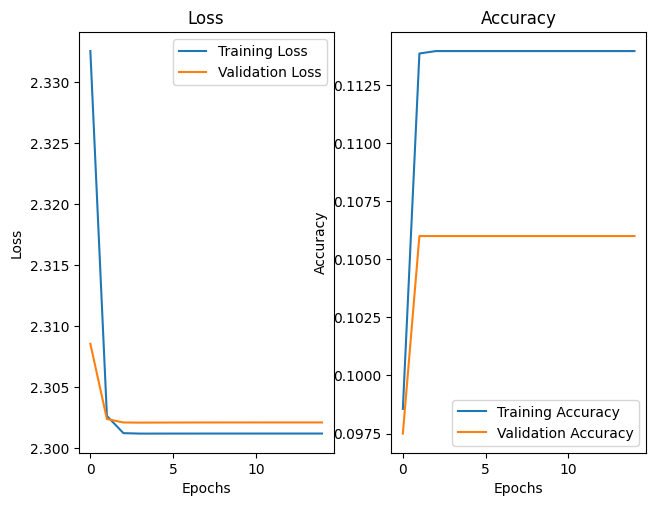

In [9]:
plot_performance(history_smallest)

In the **Loss** graph, there is an initial rapid decline, indicating a significant reduction in error during the early epochs of training. However, this decrease quickly plateaus, stabilizing at a high value (around 2.30) for both the training and validation data. This behavior suggests that the model fails to further improve its performance after the initial phase.

In the **Accuracy** graph, a similar trend can be observed. Accuracy increases rapidly during the first epochs but soon plateaus at an extremely low value (around 0.106) for both training and validation. This indicates that the model is not learning effectively.

In [10]:
score = model_smallest.evaluate(x_test, y_test, verbose=0)
print('Test loss', score[0])
print('Test accuracy', score[1])

Test loss 2.301194906234741
Test accuracy 0.11349999904632568


As shown in the graphs, the model exhibits unsatisfactory performance in both loss and accuracy on the data. The Test Loss value of 2.30 is very high, reflecting significant errors in predictions on the test data. A Test Accuracy of 0.11 highlights that the model is not effectively learning from the data.

## Model 1 - Add a convolutional layer

The first modification made to the base model's network structure involves adding a convolutional layer with 8 **filters**, each of size 5x5, using the **ReLU** activation function. In this configuration, the spatial dimensions of the model divide perfectly by the kernel and pool size, ensuring an optimal reduction in size without significant loss of information.

In [11]:
input_shape = (28,28,1)

model_1 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        
        layers.Conv2D(8, kernel_size=(5,5), activation='relu'),
        layers.MaxPooling2D(pool_size=(3,3)),
        layers.Flatten(),
        layers.Dense(num_classes, activation='softmax')
    ]
)

model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 8)      │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,338 (20.85 KB)

 Trainable params: 5,338 (20.85 KB)

 Non-trainable params: 0 (0.00 B)

The model's structure begins with a convolutional layer, producing an output with spatial dimensions of **24x24**, calculated based on the **5x5** kernel size. The convolution applies **8 filters**, resulting in **208 trainable parameters** associated with this layer.

Next, the **MaxPooling2D** layer reduces the spatial dimensions to **8x8**, while keeping the number of filters unchanged. This pooling layer does not contain any trainable parameters.

The **Flatten** layer then transforms the **8x8x8** matrix into a one-dimensional vector with **512 elements**, and, similarly, it does not have any trainable parameters.

Finally, the model includes a fully connected (**Dense**) layer, which outputs **10 neurons**. The number of parameters in this layer (**5,130**) is derived from the product of the number of neurons in the previous layer (**512**) and the number of neurons in this layer (**10**), plus the biases.

In total, the model has **5,338 parameters**, all of which are trainable. There are no non-trainable parameters.

In [12]:
batch_size = 128
epochs = 15

model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history1 = model_1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7090 - loss: 1.0966 - val_accuracy: 0.9242 - val_loss: 0.2654
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9252 - loss: 0.2601 - val_accuracy: 0.9443 - val_loss: 0.1920
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9452 - loss: 0.1892 - val_accuracy: 0.9567 - val_loss: 0.1518
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9563 - loss: 0.1499 - val_accuracy: 0.9640 - val_loss: 0.1265
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9629 - loss: 0.1246 - val_accuracy: 0.9693 - val_loss: 0.1101
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9680 - loss: 0.1073 - val_accuracy: 0.9733 - val_loss: 0.0987
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9713 - loss: 0.0946 - val_accuracy: 0.9755 - val_loss: 0.0906
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9745 - loss: 0.0848 - val_accuracy: 0.

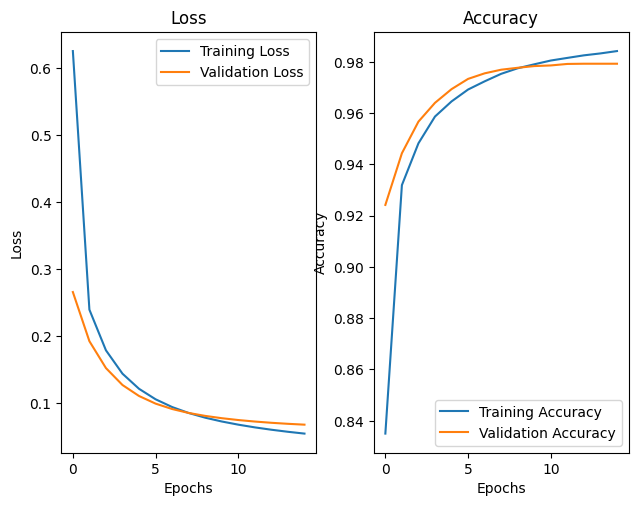

In [13]:
plot_performance(history1)

From the Loss graph, it is evident that both the training and validation loss decrease rapidly during the initial epochs, indicating that the model is effectively learning from the training data and performing well on the validation data. Both curves stabilize around **0.1**, a low value that reflects accurate predictions by the model. However, a slight overfitting trend can be observed after approximately 15 epochs.

The Accuracy graph shows a steep increase in accuracy during the early epochs, eventually stabilizing at around **0.98** for the training accuracy, demonstrating that the model is fitting the training data effectively. The validation accuracy, while slightly lower than the training accuracy, stabilizes at approximately **0.97**. Similar to the loss graph, there is a minor overfitting pattern visible around 15 epochs.

In conclusion, these graphs highlight good performance for the model with a convolutional layer, despite the slight overfitting observed in later epochs.

In [14]:
score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss', score[0])
print('Test accuracy', score[1])

Test loss 0.056756701320409775
Test accuracy 0.982200026512146


The results obtained from the model demonstrate excellent performance on the test data, as evidenced by a **test loss** of 0.05 and a **test accuracy** of 0.98. 

A very low test loss, such as 0.05 in this case, indicates that the model makes minimal errors when making predictions on the test dataset. Similarly, a test accuracy of 0.98 signifies that the model is capable of correctly classifying nearly all samples in the test dataset.

These satisfactory results were anticipated based on the earlier analysis of the training and validation graphs. The absence of underfitting and only a slight overfitting ensured that the model maintained strong performance during testing, avoiding any significant degradation in accuracy or increase in loss.

## Model 2 - Add a second convolutional layer

In questo secondo modello è stato deciso di modificare la struttura del modello uno andando ad aggiungere un layer convoluzionale seguito da un'operazione di pooling. Inoltre, è stato modificato il numero di filtri impostando a 12 con una dimensione del kernel pari a 5x5 per il primo layer convoluzionale, mentre, 23 filtri con una dimensione del kernel di 4x4 per il secondo layer convoluzionale. Per entrambi i layer la funzione di attivazione utilizzata è 'relu'.  

In [15]:
input_shape = (28,28,1)

model_2 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        
        layers.Conv2D(12, kernel_size=(5,5), activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(23, kernel_size=(4,4), activation='relu'),
        layers.MaxPooling2D(pool_size=(3,3)),
        layers.Flatten(),
        layers.Dense(num_classes, activation='softmax')
    ]
)

model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 12)     │           312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 12)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 23)       │         4,439 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 23)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 207)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,080 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,831 (26.68 KB)

 Trainable params: 6,831 (26.68 KB)

 Non-trainable params: 0 (0.00 B)

Il primo layer convoluzionale utilizza 12 filtri di dimensione 5x5 riducendo le dimensioni spaziali dell'input da 28x28 a 24x24. Il primo layer di pooling, applicato con kernel 2×2, riduce ulteriormente la dimensione spaziale a 12×12 senza modificare il numero di canali e non introduce parametri addestrabili. Successivamente, il secondo layer convoluzionale utilizza 23 filtri di dimensione 4×4, trasformando l’output in una dimensione spaziale di 9×9 con 23 canali, per un totale di 4.439 parametri. Questo è seguito da un secondo layer di pooling, con kernel 3×3, che riduce le dimensioni spaziali a 3×3 mantenendo invariato il numero di canali. L’output viene quindi trasformato in un vettore unidimensionale di 207 elementi grazie a un layer di flattening, che non introduce parametri addestrabili. Infine, il layer fully connected prende in input il vettore di 207 elementi e lo mappa su 10 neuroni, corrispondenti al numero di classi del problema, con un totale di 2.080 parametri.

Complessivamente, il modello presenta 6.831 parametri addestrabili.

In [16]:
batch_size = 128
epochs = 15

model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history2 = model_2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7218 - loss: 1.0067 - val_accuracy: 0.9647 - val_loss: 0.1228
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9611 - loss: 0.1260 - val_accuracy: 0.9717 - val_loss: 0.0915
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9724 - loss: 0.0905 - val_accuracy: 0.9754 - val_loss: 0.0787
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9771 - loss: 0.0741 - val_accuracy: 0.9789 - val_loss: 0.0702
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9797 - loss: 0.0641 - val_accuracy: 0.9813 - val_loss: 0.0630
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9822 - loss: 0.0561 - val_accuracy: 0.9837 - val_loss: 0.0573
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9840 - loss: 0.0497 - val_accuracy: 0.9840 - val_loss: 0.0539
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9856 - loss: 0.0445 - val_accuracy: 0.

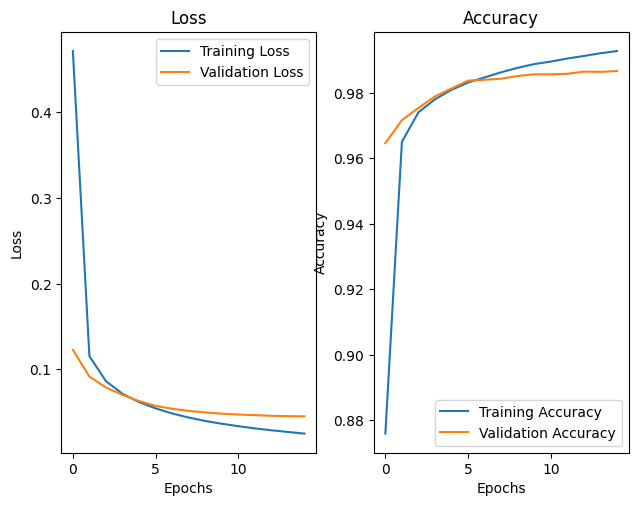

In [17]:
plot_performance(history2)

In [18]:
score = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss', score[0])
print('Test accuracy', score[1])

Test loss 0.03473421558737755
Test accuracy 0.9894999861717224
